# **Sentiment Analysis**

**Feature Engineering**

In [1]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

KeyboardInterrupt: 

**Model Selection and Evaluation**

In [ ]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



---



# Feature Extraction

**Drop Insignificant Columns**

In [ ]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "polarity", "length", "word_counts", "overall"]
dataset.drop(columns = Columns, axis = 1, inplace = True)

**Current State of The Dataset**

In [ ]:
dataset.head()

,reviews,sentiment
0,not much write exactly supposed filter pop sou...,Positive
1,product exactly quite affordable not realized ...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive


**Encoding Our Target Variable**

In [ ]:
Encoder = LabelEncoder()
dataset["sentiment"] = Encoder.fit_transform(dataset["sentiment"])

In [ ]:
dataset["sentiment"].value_counts()

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64

**TF-IDF Vectorizer**

In [ ]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(dataset["reviews"])

# Check our matrix shape
X.shape

(10261, 5000)

In [ ]:
# Declaring our target variable
y = dataset["sentiment"]

## TF-IDF + BIGRAM TRONG PHÂN LOẠI CẢM XÚC

### 🔹 TF-IDF giúp mô hình tập trung vào từ/cụm từ có ý nghĩa phân biệt:

- **TF (Term Frequency)**: Tần suất của một từ/cụm từ trong một văn bản.
- **IDF (Inverse Document Frequency)**: Giảm trọng số của các từ xuất hiện phổ biến ở hầu hết các văn bản (như “the”, “and”) vì chúng không mang ý nghĩa cảm xúc.

➡️ Kết quả là, các từ/cụm từ đặc trưng cho cảm xúc như `"not good"`, `"very bad"`, `"absolutely fantastic"`... sẽ có **trọng số cao hơn** trong vector đầu vào.

---

### 🔹 Bigram (2-gram) giúp mô hình hiểu ngữ cảnh tốt hơn:

- So với unigram (xét từng từ riêng lẻ), **bigram** xét đến **cặp từ liền kề**, giúp nắm bắt tốt hơn các ngữ cảnh phủ định hoặc nhấn mạnh trong cảm xúc.
- Ví dụ: `"not good"` (phủ định), `"very happy"` (cường điệu tích cực).

---

### 🔹 Chuẩn hóa dữ liệu đầu vào cho mô hình học máy:

- Sau khi vector hóa, mỗi **review** trở thành một **vector số có độ dài cố định**, đại diện cho **trọng số TF-IDF của 5000 bigram phổ biến nhất**.
- ➡️ Giúp các mô hình học máy như **Logistic Regression**, **Naive Bayes**, **SVM**... học được mối liên hệ giữa cụm từ và nhãn cảm xúc (Positive, Negative, Neutral...).


**Resampling Our Dataset**

* chúng tôi sẽ sử dụng SMOTE (Kỹ thuật tổng hợp lấy mẫu thiểu số), kỹ thuật này sẽ tạo ngẫu nhiên các bản sao tổng hợp mới từ dữ liệu thiểu số để cân bằng lại tập dữ liệu.*

In [ ]:
Counter(y)

Counter({2: 9022, 1: 772, 0: 467})

In [ ]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [ ]:
Counter(y_final)

Counter({2: 9022, 1: 9022, 0: 9022})

**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state = 42)




---



# Model Selection and Evaluation

*Áp dụng một số kỹ thuật cross-validation để tìm ra mô hình tối ưu*

**Model Building**

In [ ]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.8219471919005563
Logistic Regression Test Accuracy: 0.8819802942387887
SVC Test Accuracy: 0.8805184008381876
Random Forest Test Accuracy: 0.8760351598459526
Naive Bayes Test Accuracy: 0.8099589827104816
K-Neighbors Test Accuracy: 0.8476764777897356


*Chúng tôi có sáu mô hình đã thử nghiệm, và từ kết quả của kỹ thuật Cross Validation với 10 lần gập (10-Fold), có thể thấy rằng mô hình Logistic Regression là mô hình tốt nhất với độ chính xác cao nhất, chỉ nhỉnh hơn SVC một chút. Vì lý do đó, chúng tôi sẽ sử dụng mô hình tốt nhất này để dự đoán cảm xúc, đồng thời thực hiện tinh chỉnh tham số và đánh giá kết quả cuối cùng để xem mô hình hoạt động hiệu quả đến đâu.*

**Hyperparameter Tuning**

In [ ]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppDat

Best Accuracy: 95.12 %
Best Parameters: {'C': 10000.0, 'penalty': 'l2'}


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Chúng tôi đã đạt được độ chính xác khá cao trên tập huấn luyện, cụ thể là 95.12%, và thông qua quá trình Grid Search, chúng tôi cũng đã tìm ra được các siêu tham số tối ưu. Đã đến lúc hoàn thiện mô hình bằng cách sử dụng các tham số này để xây dựng phiên bản tốt nhất của Logistic Regression.*

**Best Model**

In [ ]:
Classifier = LogisticRegression(random_state = 42, C =10000, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Bây giờ khi mô hình đã được hoàn thiện, chúng tôi sẽ tiến hành kiểm tra mô hình trên tập dữ liệu kiểm tra. Các chỉ số đánh giá mà chúng tôi sử dụng sẽ dựa trên các dự đoán được tạo ra từ bước này.*

**Metrics**

Accuracy On Test Set

In [ ]:
accuracy_score(y_test, Prediction)

0.9521610639083856

*Chúng tôi đã đạt được độ chính xác rất cao ở bước này, lên tới 95,21%. Tuy nhiên, chúng tôi vẫn cần xem xét Ma trận nhầm lẫn (Confusion Matrix) và F1 Score để đánh giá chính xác hiệu suất của mô hình.*

Confusion Matrix

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

Visualizing Our Confusion Matrix

In [ ]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


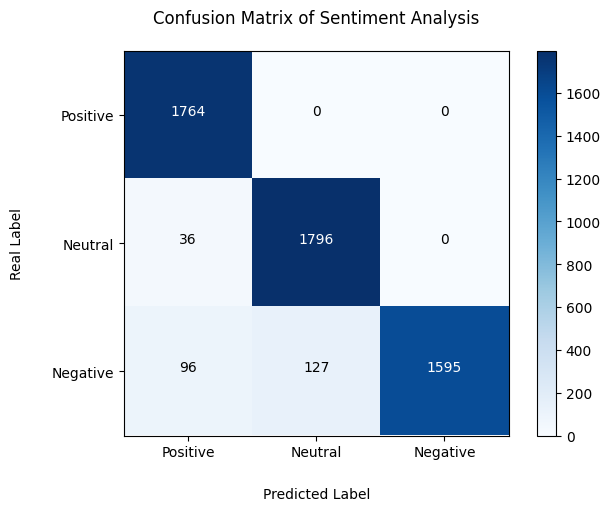

In [ ]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

*Dựa vào Ma trận nhầm lẫn ở trên, chúng ta có thể thấy rằng mô hình nhìn chung hoạt động khá tốt. Mô hình có khả năng phân loại đúng các cảm xúc tích cực và trung tính, tuy nhiên vẫn gặp đôi chút khó khăn trong việc xác định cảm xúc tiêu cực. Tất nhiên, điều này là do sự mất cân bằng trong dữ liệu ban đầu dù đã giảm thiểu ảnh hưởng đó nhờ vào kỹ thuật lấy mẫu lại SMOTE được áp dụng trước đó.*

Classification Scores

In [ ]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1764
           1       0.93      0.98      0.96      1832
           2       1.00      0.88      0.93      1818

    accuracy                           0.95      5414
   macro avg       0.95      0.95      0.95      5414
weighted avg       0.95      0.95      0.95      5414



*Tổng thể, với từng loại cảm xúc trong tập dữ liệu, chúng tôi đạt được F1 Score ở mức 95%, đây là một kết quả rất tốt. Vì vậy, chúng tôi có thể kết luận rằng mô hình hoạt động hiệu quả trên tập dữ liệu này.*